SSIM Index: 0.9271448957365284


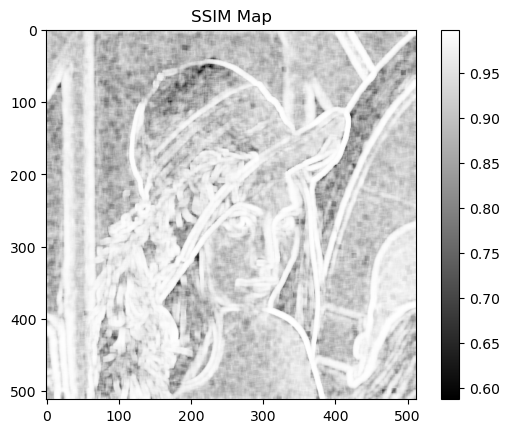

In [4]:
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

image1 = img_as_float(io.imread('lena.png', as_gray=True))
image2 = img_as_float(io.imread('decoded_lena.jpg', as_gray=True))

if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

data_range = image1.max() - image1.min()

ssim_index, ssim_image = ssim(image1, image2, full=True, data_range=data_range)

print(f"SSIM Index: {ssim_index}")

plt.imshow(ssim_image, cmap='gray')
plt.title('SSIM Map')
plt.colorbar()
plt.show()


In [23]:
import numpy as np
from skimage import io, img_as_float

image = img_as_float(io.imread('lena.png'))

# raw size of the image is defined as
height, width, channels = image.shape
raw_size = width * height * channels
print(f"Raw Size: {raw_size}")

Raw Size: 786432


In [24]:
def decompress_float(data):
    decompressed_data = zlib.decompress(data)
    array = np.array(unpack(f'{len(decompressed_data) // 4}f', decompressed_data), dtype=np.float32)
    return array

with open(encoded_file, 'rb') as f:
    H, W = unpack('II', f.read(8))
    num_slices = unpack('I', f.read(4))[0]
    if num_slices > 0:
        serialized_slices = f.read(num_slices)
        loaded_DCT1_Haar1_coeff = pickle.loads(serialized_slices)
    else:
        loaded_DCT1_Haar1_coeff = None
    compressed_data = f.read()

encoded_data = decompress_float(compressed_data)
encoded_data = np.reshape(encoded_data, (H, W))

non_zero_coefficients = np.count_nonzero(encoded_data)

# not sure if this ratio is the correct one
ratio = raw_size / non_zero_coefficients if non_zero_coefficients > 0 else float('inf')

print(f"Raw Size: {raw_size}")
print(f"Non-Zero Coefficients: {non_zero_coefficients}")
print(f"Ratio: {ratio}")

Raw Size: 786432
Non-Zero Coefficients: 262144
Ratio: 3.0
